In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
file_path = "/content/NIFTY BANK.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date', dayfirst=True)

In [4]:
ts = df['Close'].astype(float).dropna()
print(df.head())

            Index Name      Open      High       Low     Close
Date                                                          
2025-02-17  NIFTY BANK  48880.40  49319.00  48525.60  49258.90
2025-02-14  NIFTY BANK  49485.65  49592.95  48719.75  49099.45
2025-02-13  NIFTY BANK  49469.35  49836.10  49276.10  49359.85
2025-02-12  NIFTY BANK  49402.25  49702.35  48734.35  49479.45
2025-02-11  NIFTY BANK  49812.15  49906.75  49177.40  49403.40


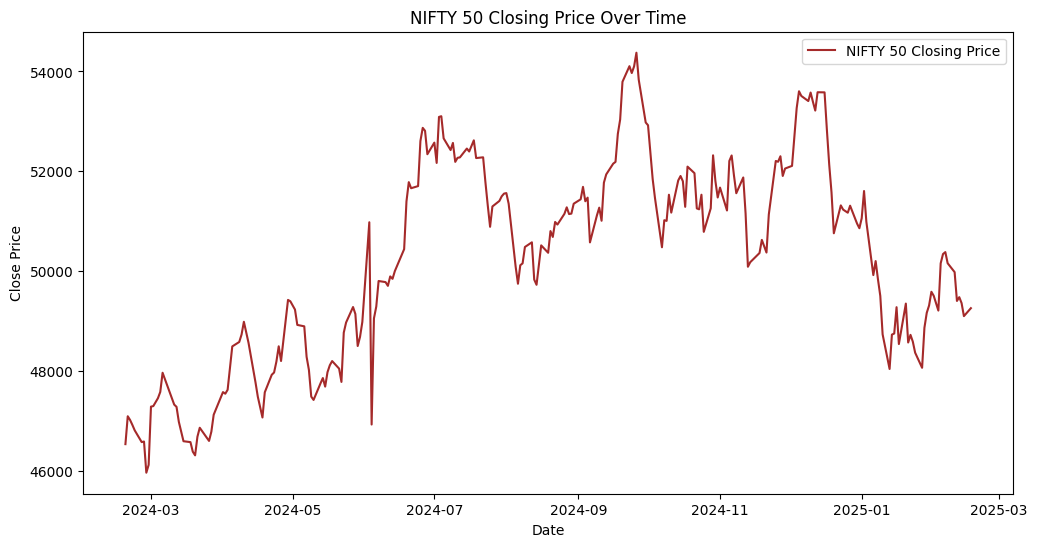

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(ts, label='NIFTY 50 Closing Price', color='brown')
plt.title('NIFTY 50 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [6]:
adf_test = adfuller(ts)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -1.3587950550082502
p-value: 0.601863236172532


<Figure size 1200x600 with 0 Axes>

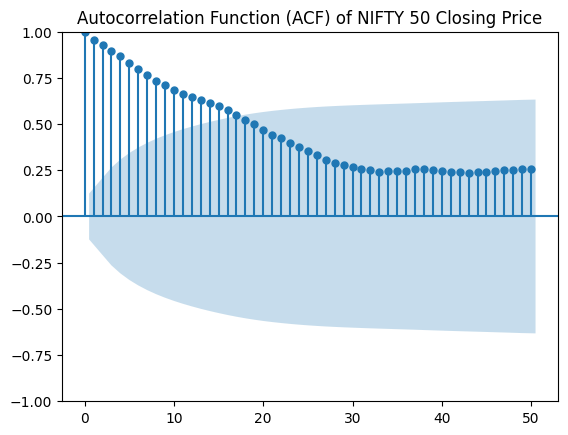

In [7]:
plt.figure(figsize=(12, 6))
plot_acf(ts, lags=50)
plt.title("Autocorrelation Function (ACF) of NIFTY 50 Closing Price")
plt.show()

<Figure size 1200x600 with 0 Axes>

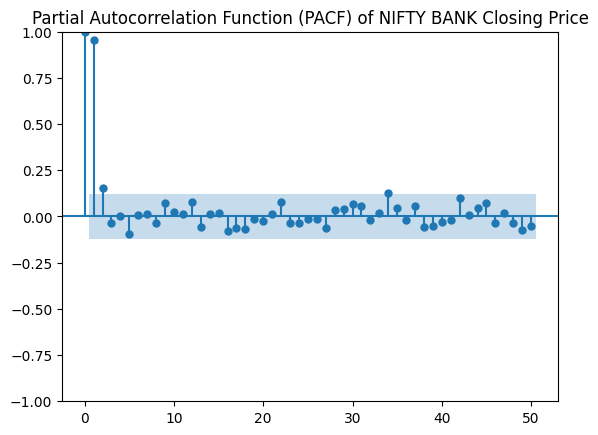

In [12]:
plt.figure(figsize=(12, 6))
plot_pacf(ts, lags=50)
plt.title("Partial Autocorrelation Function (PACF) of NIFTY BANK Closing Price")
plt.show()

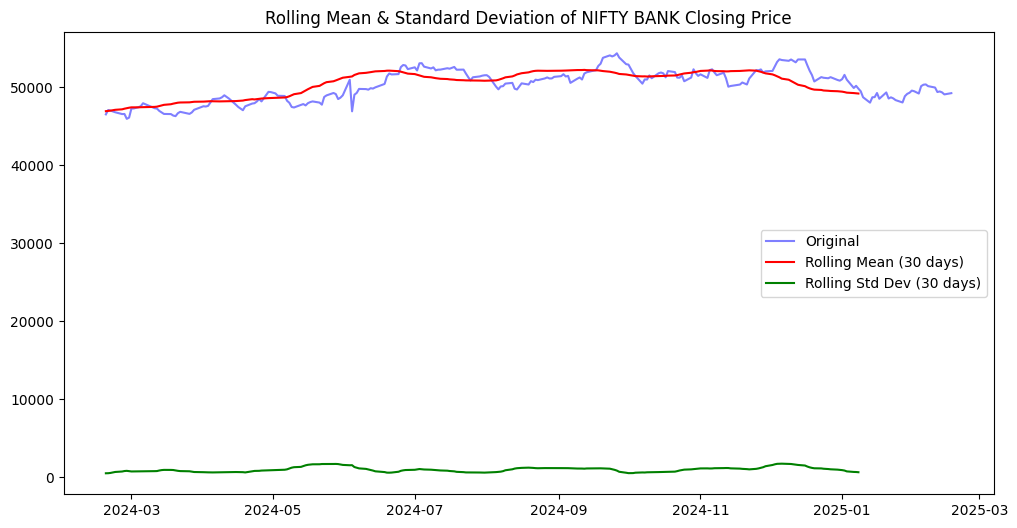

In [11]:
rolling_mean = ts.rolling(window=30).mean()
rolling_std = ts.rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original', color='blue', alpha=0.5)
plt.plot(rolling_mean, label='Rolling Mean (30 days)', color='red')
plt.plot(rolling_std, label='Rolling Std Dev (30 days)', color='green')
plt.title('Rolling Mean & Standard Deviation of NIFTY BANK Closing Price')
plt.legend()
plt.show()

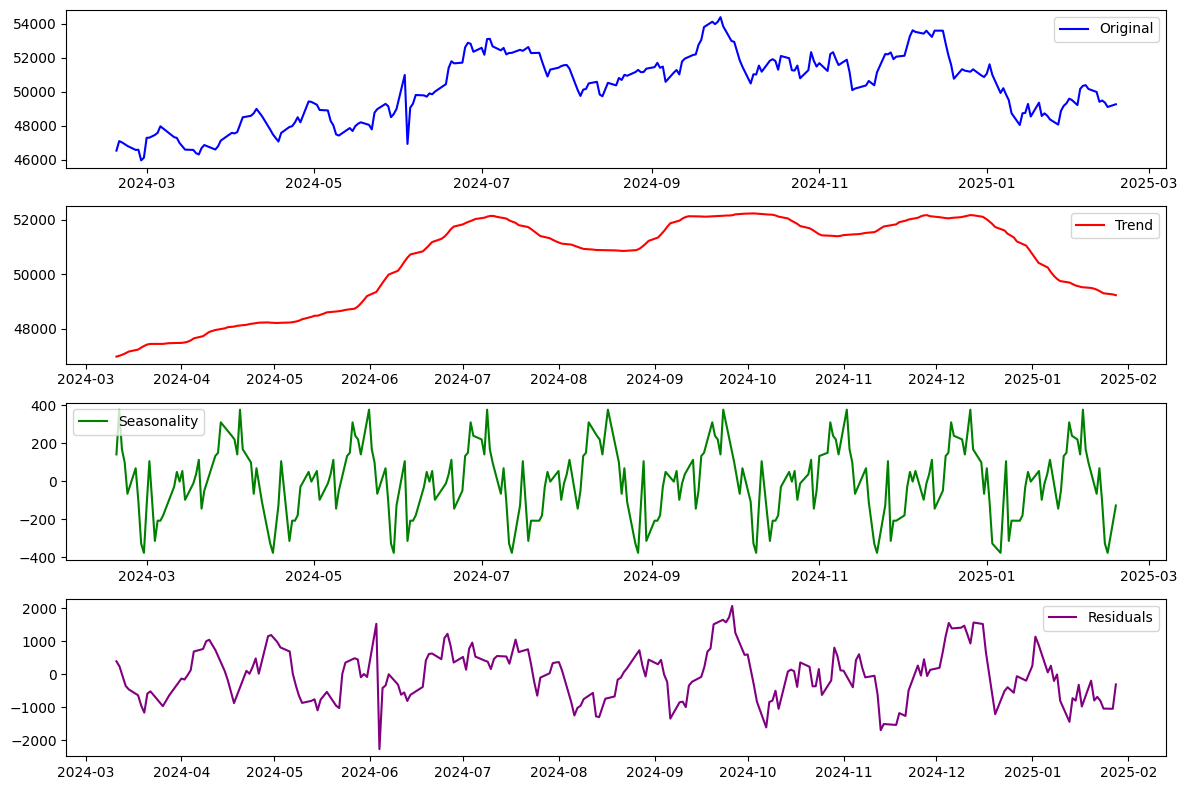

In [10]:
decomposition = seasonal_decompose(ts, model='additive', period=30)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(ts, label='Original', color='blue')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='purple')
plt.legend()
plt.tight_layout()
plt.show()